In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import textwrap
from pathlib import Path

## Classifier accuracies on some synthetic data

In [86]:
RESULTS_DATA_DIR = Path("../results_data")
flant5_df = pd.read_csv(RESULTS_DATA_DIR / "table_flant5.csv", index_col=[0, 1])
phi2_df = pd.read_csv(RESULTS_DATA_DIR / "table_phi2.csv", index_col=[0, 1])
tinyllama_df = pd.read_csv(RESULTS_DATA_DIR / "table_tinyllama.csv", index_col=[0, 1])

In [87]:
tinyllama_df

CNN  LogisticRegression  LSTM  NaiveBayes  \
max_new_tokens repetition_penalty                                              
100            0.5                 1.0                1.00  0.95        1.00   
               1.0                 1.0                0.95  1.00        0.90   
200            0.5                 1.0                1.00  0.95        0.95   
               1.0                 1.0                1.00  1.00        1.00   

                                   RandomForest   RNN   SVM  
max_new_tokens repetition_penalty                            
100            0.5                          1.0  1.00  1.00  
               1.0                          1.0  1.00  0.90  
200            0.5                          1.0  0.95  0.95  
               1.0                          1.0  1.00  1.00

In [88]:
phi2_df

CNN  LogisticRegression  LSTM  NaiveBayes  \
max_new_tokens repetition_penalty                                              
100            0.5                 1.0                1.00  1.00        0.95   
               1.0                 0.8                0.55  0.95        0.50   
200            0.5                 1.0                1.00  1.00        0.95   
               1.0                 0.7                0.60  0.85        0.35   

                                   RandomForest   RNN   SVM  
max_new_tokens repetition_penalty                            
100            0.5                         1.00  1.00  1.00  
               1.0                         0.95  0.45  1.00  
200            0.5                         1.00  1.00  1.00  
               1.0                         0.95  0.35  0.95

In [89]:
flant5_df

CNN  LogisticRegression  LSTM  NaiveBayes  \
max_new_tokens repetition_penalty                                               
100            0.5                 0.90                0.90  0.90        0.75   
               1.0                 0.90                0.95  0.90        0.80   
200            0.5                 0.90                0.90  0.95        0.75   
               1.0                 0.85                0.90  0.80        0.80   

                                   RandomForest   RNN   SVM  
max_new_tokens repetition_penalty                            
100            0.5                          1.0  0.80  0.60  
               1.0                          1.0  0.80  0.90  
200            0.5                          1.0  0.75  0.65  
               1.0                          1.0  0.70  0.95

## Effects of synthetic data

In [90]:
with open(RESULTS_DATA_DIR / "total_results.json", "r") as f:
    total_results: dict = json.load(f)

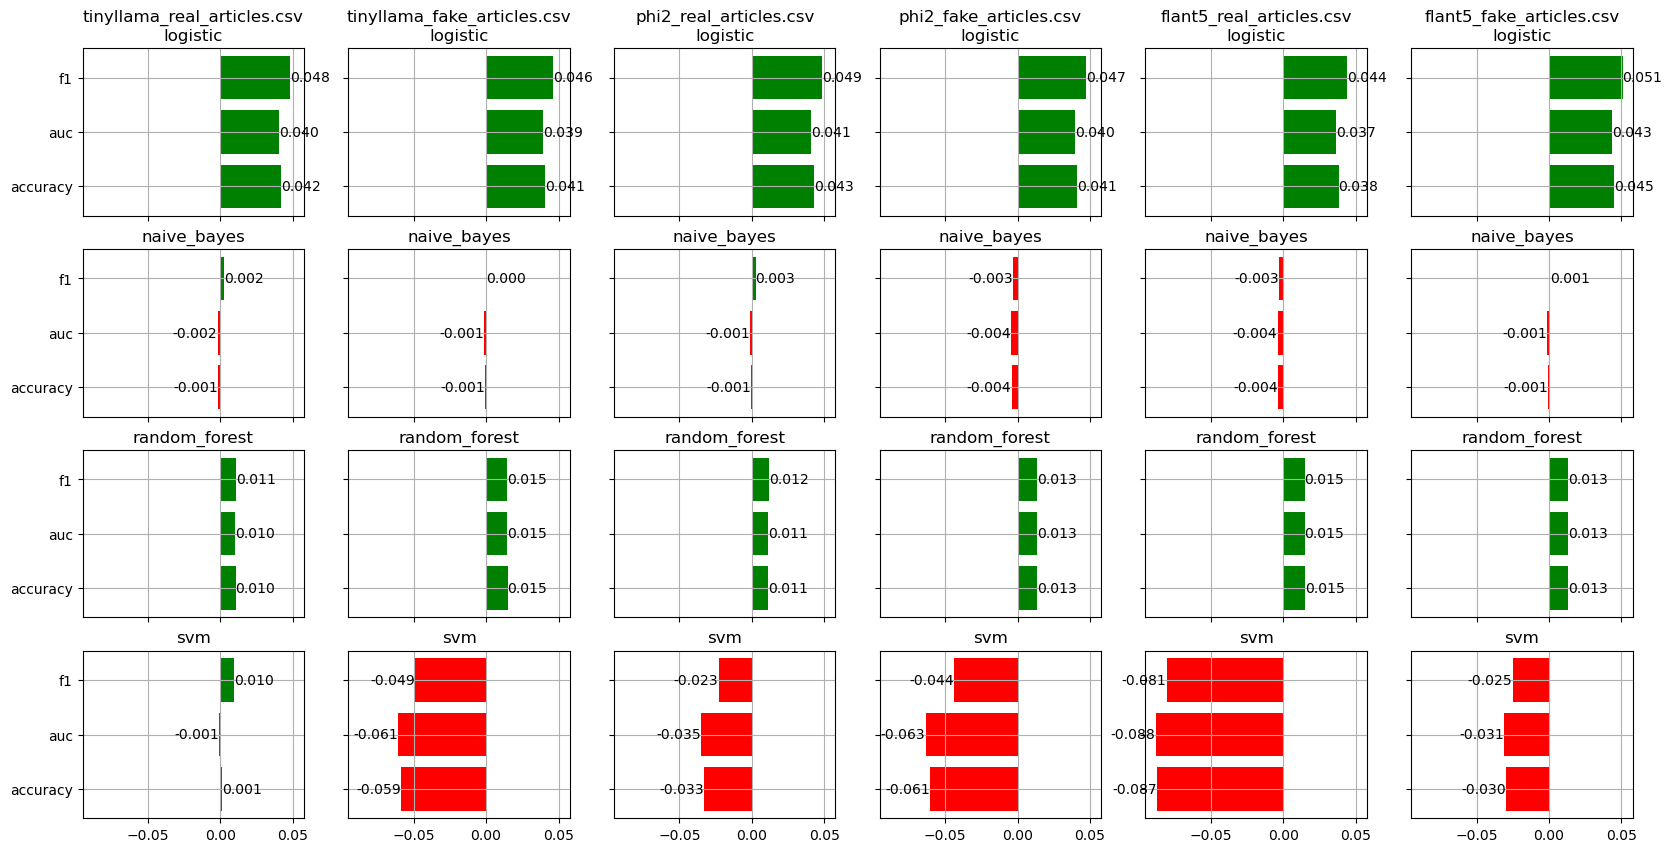

In [91]:
fig, axs = plt.subplots(
    4,
    len(total_results),  
    figsize=(20, 10), 
    sharex=True,
    sharey=True
)

for i, (filename, file_results) in enumerate(total_results.items()):
    for j, (model_name, model_results) in enumerate(file_results.items()):
        metric_names = list(model_results["orig"].keys())
        orig_values = list(model_results["orig"].values())
        combined_values = list(model_results["combined"].values())
        diffs = np.array(combined_values) - np.array(orig_values)
        colors = np.where(diffs > 0, "green", "red")
        ax: plt.Axes = axs[j, i]
        bars = ax.barh(y=metric_names, width=diffs, color=colors)
        ax.bar_label(bars, fmt="{:.3f}")
        if j == 0:
            ax.set_title(f"{filename}\n{model_name}")
        else:
            ax.set_title(model_name)
        ax.grid(True)
plt.show()

## Examples of generated texts

In [92]:
DATA_DIR = Path("../data")

generator_names = ["flant5_real", "flant5_fake", "phi2_real", "phi2_fake", "tinyllama_real"]
synth_dict = {
    gen_name: pd.read_csv(DATA_DIR / f"{gen_name}_articles.csv")
    for gen_name in generator_names
}

In [93]:
def print_article(df: pd.DataFrame, ind: int):
    title, text, label = df.iloc[ind]
    print("TITLE:\n", title)
    print("ARTICLE:\n", textwrap.fill(text))

In [94]:
IND = 42
print_article(synth_dict["flant5_real"], IND)
print()
print_article(synth_dict["phi2_real"], IND)
print()
print_article(synth_dict["tinyllama_real"], IND)

TITLE:
 Re: Looks Like Someone Thinks the Democrats in Ohio Are Full of Manure
ARTICLE:
 Apparently the Dems are fully in denial about the existence of Sharia
law and that all political parties need to stop talking about it. SF
Source Sally Fields (@SallyFields) October 27, 2016 OBAMA STILL
DIVIDED THE FUNDRAISER WITH A MEMBERSHIP PLEASE READ MORE ON THIS NEWS
AT: 21st Century Wire Election Filesed Up! with Applegate Infowars
pic.twitter.com/oE5WYLKNkF TRUMP IS FAKE AND NO LATERNATIVE MOMENT IN
OCCUPPORT THE PEOPLE WHO WILL BE LAUGHING FOR MONEY & PROPERTY
DAMAGESed Up! With New York Times Illustration "Language Crisis"
https://t.co/1hrB3A6pc Bob Schierweiler (@bob_skeierweiler

TITLE:
 Re: Looks Like Someone Thinks the Democrats in Ohio Are Full of Manure
ARTICLE:
 The Ugly Truth About The New York Times’s “Climate Change Is Already
Here, and It's Not Pretty" by David Harsanyi (National Review) – "In a
recent article titled    climate change is already here,and it s not
pretty.the NYT